## 데이터 분석 전 기본적인 환경 setting

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/olist

/content/drive/MyDrive/olist


In [ ]:

# 필요모듈 import

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
files = [f for f in os.listdir() if f.endswith(".csv")]
print(files)

['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_orders_dataset.csv', 'olist_products_dataset.csv', 'product_category_name_translation.csv', 'olist_sellers_dataset.csv', 'all_dataset2.csv', 'all_dataset3.csv', 'trpicaol.csv', 'tropical.csv', 'tropical_state.csv', 'dataset.csv', 'second_data.csv', 'olist_order_reviews_dataset.csv']


In [ ]:
# order
orders = pd.read_csv('olist_orders_dataset.csv')

# customers
customers = pd.read_csv('olist_customers_dataset.csv')

# products
item = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
name = pd.read_csv('product_category_name_translation.csv')
pay = pd.read_csv('olist_order_payments_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# Geolocation
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

In [ ]:
# 데이터 Shape,Columns 확인

# 데이터프레임 생성
dataframes = [
    ("Order Data", orders),
    ("Customer Data", customers),
    ("Order Item Data", item),
    ("Product Data", products),
    ("category name Data", name),
    ("Order Payment Data", pay),
    ("Seller Data", sellers),
    ("Order Review Data", reviews),
    ("Geolocation Data", geolocation)
]

# 데이터프레임 정보를 저장할 리스트 초기화
df_info_list = []

for data_name, df in dataframes:
    # 데이터프레임 정보를 딕셔너리로 저장
    df_info = {
        "Data Name": data_name,
        "Shape": df.shape,
        "Columns": df.columns.tolist()
    }
    df_info_list.append(df_info)

# 데이터프레임 정보를 출력
df_info_df = pd.DataFrame(df_info_list)
display(df_info_df)

,Data Name,Shape,Columns
0,Order Data,"(99441, 8)","[order_id, customer_id, order_status, order_pu..."
1,Customer Data,"(99441, 5)","[customer_id, customer_unique_id, customer_zip..."
2,Order Item Data,"(112650, 7)","[order_id, order_item_id, product_id, seller_i..."
3,Product Data,"(32951, 9)","[product_id, product_category_name, product_na..."
4,category name Data,"(71, 2)","[product_category_name, product_category_name_..."
5,Order Payment Data,"(103886, 5)","[order_id, payment_sequential, payment_type, p..."
6,Seller Data,"(3095, 4)","[seller_id, seller_zip_code_prefix, seller_cit..."
7,Order Review Data,"(99224, 7)","[review_id, order_id, review_score, review_com..."
8,Geolocation Data,"(1000163, 5)","[geolocation_zip_code_prefix, geolocation_lat,..."


In [ ]:
# data merge
df = orders.merge(customers, on="customer_id").merge(item, on="order_id").merge(products, on="product_id").merge(name, on="product_category_name").merge(pay, on="order_id").merge(sellers, on="seller_id").merge(reviews, on="order_id")

In [ ]:
# review_comment는 포르투갈어로 되어있고, score가 더 중요하다고 생각하여 제외

df.drop(['review_comment_message','review_comment_title'], axis=1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,credit_card,3,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,credit_card,1,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,2017-08-08 00:00:00,2017-08-08 23:26:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06 00:00:00,c5da6424f1f5decedef8672a1a0103e1,88350,...,credit_card,5,314.32,95910,lajeado,RS,a6a6d2f97b28e8aca22046635855fe63,5,2018-08-25 00:00:00,2018-08-27 16:43:30
115605,2c12150c742ae2fa48bc703964c16c5f,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,2018-08-03 17:46:46,2018-08-16 00:00:00,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,...,credit_card,7,77.50,17201,jau,SP,6b7c670a784ae6d3f17ee1d4b28d197e,5,2018-08-04 00:00:00,2018-08-05 22:10:19
115606,9f7ba492c273ffac8f90a623b8eadd3b,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,2018-08-24 03:24:24,2018-08-24 15:14:00,2018-08-28 02:06:35,2018-09-03 00:00:00,428f4721a509be8c52de6ec2900ba918,12305,...,boleto,1,24.69,17201,jau,SP,24e88b5f641a6a3219ce7a730509d570,5,2018-08-28 00:00:00,2018-08-31 00:26:10
115607,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,8d80e477643ec569b24592ce3d9dfc4c,9951,...,credit_card,1,84.63,17201,jau,SP,ad0de1dda4fa03e8efb68c481b31ebf8,3,2018-07-28 00:00:00,2018-08-03 01:58:42


In [ ]:
# df = df.drop(df[(df['order_status'] == 'canceled') & (df['order_delivered_customer_date'].isna())].index)

In [ ]:
# deliverd 일 때 NaN인 경우 review_creation_date 리뷰 작성 일자로 대체

df['order_delivered_customer_date'] = np.where((df['order_status'] == 'delivered') & (df['order_delivered_customer_date'].isna()), df['review_creation_date'], df['order_delivered_customer_date'])

In [ ]:
# order_delivered_carrier_date는 'shipped', 'delivered'인 경우 이미 배송이 출발했거나 도착한 경우이므로 NaN값 제외
# 이외 order_status는 'NULL'로 처리

df1 = df[(df['order_status'].isin(['shipped', 'delivered'])) & (df['order_delivered_carrier_date'].isna())]
df = df.drop(df1.index)

In [ ]:
# product 결측치 처리

df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']][df.product_weight_g.isna()]

df.drop(109144, inplace=True)

In [ ]:
# df.to_csv('second_data.csv', index=False)

In [ ]:
# # 'customer_state' 열을 기준으로 데이터를 그룹화하고 레코드 수를 계산
# state_counts = df.groupby('customer_state').size().reset_index(name='record_count')

# # 결과 출력
# print(state_counts)

## 기후별 카테고리 분석


In [ ]:
# 'customer_state' 값을 기반으로 열대 기후와 온대 기후로 나누는 함수 정의
def classify_climate(state):
    tropical_climate_states = ['AM', 'AC', 'AP', 'RR', 'PA', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
    if state in tropical_climate_states:
        return 'tropical'
    else:
        return 'temperate'

# 'customer_state' 열에 classify_climate 함수를 적용하여 새로운 열 생성
df['climate'] = df['customer_state'].apply(classify_climate)

In [ ]:
# 'climate' 열의 값 분포를 확인
climate_counts = df['climate'].value_counts()

print(climate_counts)

In [ ]:
climate_percentages = df['climate'].value_counts(normalize=True) * 100

print(climate_percentages)

In [ ]:
# tropical 기후에 해당하는 데이터만 필터링
tropical_df = df[df['climate'] == 'tropical']

# 'customer_state'로 그룹화하고 'climate' 열의 합계 계산
tropical_by_state = tropical_df.groupby('customer_state')['climate'].count()

# 결과 출력
print(tropical_by_state)


In [ ]:
# tropical 기후에 해당하는 데이터만 필터링
temperate_df = df[df['climate'] == 'temperate']

# 'customer_state'로 그룹화하고 'climate' 열의 합계 계산
temperate_by_state = temperate_df.groupby('customer_state')['climate'].count()

# 결과 출력
print(temperate_by_state)

In [ ]:
# tropical 기후에 해당하는 데이터만 필터링
tropical_df = df[df['climate'] == 'tropical']

# 'product_category_name_english'로 그룹화하고 매출 합계 계산
category_sales = tropical_df.groupby('product_category_name_english')['payment_value'].sum()

# 매출 기준으로 내림차순 정렬하고 상위 10개 확인
top_categories = category_sales.sort_values(ascending=False).head(10)

# 결과 출력
print(top_categories)


In [ ]:
temperate_df = df[df['climate'] == 'temperate']

# 'product_category_name_english'로 그룹화하고 매출 합계 계산
category_sales = temperate_df.groupby('product_category_name_english')['payment_value'].sum()

# 매출 기준으로 내림차순 정렬하고 상위 10개 확인
top_categories = category_sales.sort_values(ascending=False).head(10)

# 결과 출력
print(top_categories)


#### **열대지방**

Health & Beauty 미용 및 건강 품목 수요가 가장 높음
항상 인기가 많은 품목이나 특히 열대 기후는 햇빛에 노출되는 피부 관리가 중요함

Sports & Leisure (스포츠 및 레저)도 열대 기후에서는 야외 스포츠 및 레저 활동을 즐기기 좋은 환경이 제공되기에 스포츠 및 레저용품에 대한 수요가 높은 편

\
-> 열대 기후에서는 온도와 습도 등의 기후 조건에 따라 일부 제품 카테고리의 수요가 높음

\
#### **온대지방**

bed_bath_table 가구나 침구,욕실 용품 계열이 높음, 그 외 computers_accessories,
health_beauty,furniture_decor 실내 제품들 수요가 높음


\
\
인구 밀도와 데이터 모수의 차이가 크지만 특정 제품 카테고리 순위가 다른 것은 기후 조건이 소비 패턴에 영향을 미치는걸 확인


\
**인구 밀도와 지리적 요인**\
열대 지방은 인구 밀도가 낮고, 넓은 지역을 포함하며, 주로 아마존 우림과 같은 자연 환경으로 구성.
이에 따라 물류 및 배송 서비스가 부족하고, 접근성이 낮을 가능성 높음

**데이터 모수의 영향**\
데이터 모수가 충분하지 않으면 특정 패턴이나 추세를 정확하게 파악하기 어려움\
작은 지역에서 데이터가 적을 경우, 특정 제품 카테고리 순위가 불안정할 수 있음

**소비 패턴의 기후 영향** \
열대 기후와 온대 기후는 다른 기후 조건으로, 사람들의 생활 및 구매 패턴에 영향을 미침  
열대 지방에서는 높은 기온과 습도로 인해 건강 및 스포츠 관련 제품에 수요가 높고, 온대 지방은 더 다양한 생활 환경을 가지고 있어 가구용품 및 가전제품에 더 수요가 높음

\

열대 및 온대 지역의 소비자들은 지역의 기후, 인구 분포, 인프라 및 생활 환경에 따라 다른 소비 습관을 갖고 있으며,
이로 인해 특정 제품 카테고리의 수요가 다름을 확인함\
이러한 패턴을 파악하고 이해함으로써 이익 극대화를 위한 비즈니스 및 마케팅 전략 모색

## 리뷰 점수별 재구매율 분석

### 리뷰 4-5점 준 고객 중에서 2회 이상,1회 이하 구매한 고객의 비율

In [ ]:
# 리뷰 점수가 4~5점을 준 고객들 중에서 배송 상태가 'delivered'이고 구매 횟수가 1 이상인 고객 필터링
high_rating_customers = df[(df['review_score'] >= 4) & (df['review_score'] <= 5) & (df['order_status'] == 'delivered') & (df.groupby('customer_id')['order_id'].transform('count') >= 1)]

# 총 고객 수 계산
total_customers = high_rating_customers['customer_id'].nunique()

# 결과 출력
print("높은 리뷰 점수를 준 고객 중 구매 횟수가 1회 이상인 고객의 총 인원 수:", total_customers, "명")

높은 리뷰 점수를 준 고객 중 구매 횟수가 1회 이상인 고객의 총 인원 수: 74663 명


In [ ]:
# 높은 리뷰 점수(4~5점)를 주고 구매 횟수가 2회 이상인 고객 수
repeat_customers_count = 8317

# 총 고객 수
total_customers = 74663

# 재구매율 계산
repurchase_rate = (repeat_customers_count / total_customers) * 100

# 결과 출력
print(f"2회 이상 재구매한 고객: {repurchase_rate:.2f}%")

# 구매 횟수가 1회 이하인 고객 수
repeat_customers_count = 66346


# 재구매율 계산
repurchase_rate = (repeat_customers_count / total_customers) * 100

# 결과 출력
print(f"재구매 안한 고객: {repurchase_rate:.2f}%")

2회 이상 재구매한 고객: 11.14%
재구매 안한 고객: 88.86%


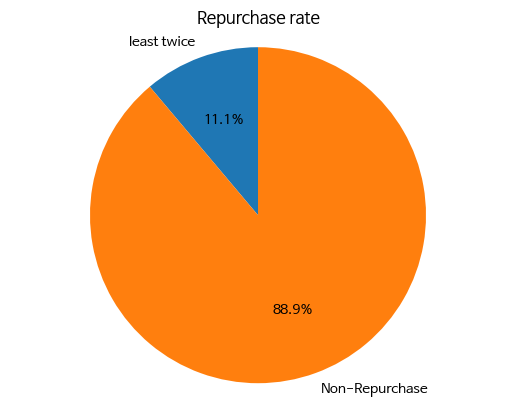

In [ ]:
# 재구매율 데이터
labels = ['least twice', 'Non-Repurchase']
sizes = [8317, 66346]  # 각각의 재구매율 데이터

# 파이 차트 생성
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# 원을 원형으로 보이게 함
ax1.axis('equal')

# 차트 제목 설정
plt.title('Repurchase rate')

# 차트 표시
plt.show()

### 구매 횟수에 따른 고객 수 집계

In [ ]:
# 리뷰 점수가 4~5점을 준 고객들 중에서 배송 상태가 'delivered'인 고객들만 필터링
high_rating_customers = df[(df['review_score'] >= 4) & (df['review_score'] <= 5) & (df['order_status'] == 'delivered')]

# 중복된 customer_id를 제외하고 재구매한 횟수 계산
repeat_purchase_counts = high_rating_customers.groupby('customer_id').agg({
    'order_id': 'count'  # 주문 횟수(재구매 횟수)를 계산
}).reset_index()

# 재구매 횟수가 1회 이하인 고객만 필터링
repeat_purchase_counts_1_or_fewer = repeat_purchase_counts[repeat_purchase_counts['order_id'] <= 1]

# 재구매 횟수가 2회 이상인 고객만 필터링
repeat_purchase_counts_2_or_more = repeat_purchase_counts[repeat_purchase_counts['order_id'] >= 2]

# 재구매 횟수가 3회 이상인 고객만 필터링
repeat_purchase_counts_3_or_more = repeat_purchase_counts[repeat_purchase_counts['order_id'] >= 3]

# 각각의 인원 수 계산
total_high_rating_repeat_customers_1_or_fewer = len(repeat_purchase_counts_1_or_fewer)
total_high_rating_repeat_customers_2_or_more = len(repeat_purchase_counts_2_or_more)
total_high_rating_repeat_customers_3_or_more = len(repeat_purchase_counts_3_or_more)

# 결과 출력
print(f"구매 횟수가 1회 이하: {total_high_rating_repeat_customers_1_or_fewer}명")
print(f"구매 횟수가 2회 이상: {total_high_rating_repeat_customers_2_or_more}명")
print(f"구매 횟수가 3회 이상: {total_high_rating_repeat_customers_3_or_more}명")

구매 횟수가 1회 이하: 66346명
구매 횟수가 2회 이상: 8317명
구매 횟수가 3회 이상: 1855명


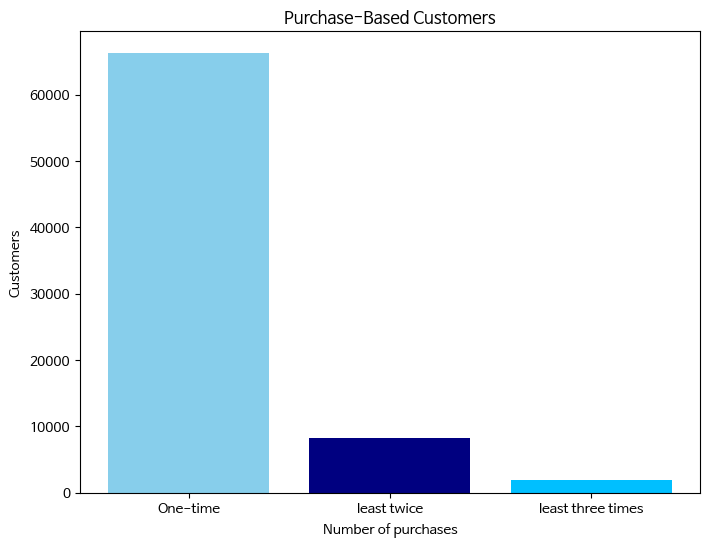

In [ ]:
# 구매 횟수에 따른 고객 수 데이터
categories = ['One-time','least twice','least three times']
counts = [total_high_rating_repeat_customers_1_or_fewer,total_high_rating_repeat_customers_2_or_more,total_high_rating_repeat_customers_3_or_more]

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'navy','deepskyblue'])
plt.xlabel('Number of purchases')
plt.ylabel('Customers')
plt.title('Purchase-Based Customers')
plt.show()

#### 고객 유입 시기 파악
-> 단발성 구매가 왜 많았나? 시기별 유입 시기를 알아보고 큰 이슈가 있었는지 파악

In [ ]:
# 연도별,월별 구매횟수 집계
# 구매 기준일 :order_purchase_timestamp

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['Year'] = df['order_purchase_timestamp'].dt.strftime('%Y')  # 연도 추출하여 Year 열 만들기
df['Month'] = df['order_purchase_timestamp'].dt.strftime('%m')  # 월 추출하여 Month 열을 만들기

# # order_status가 'unavailable' 또는 'canceled'인 행 제외
# df = df[(df['order_status'] != 'unavailable') & (df['order_status'] != 'canceled')]

# 월별 구매 횟수 계산
monthly = df.groupby(['Year', 'Month']).size().reset_index(name='OrderCount')

# 연도별 구매 횟수 계산
yearly = monthly.groupby('Year')['OrderCount'].sum().reset_index()

# 연도와 월을 문자열 변환
monthly['Month'] = monthly['Month'].replace({
    '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr',
    '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug',
    '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
})

print(monthly)
print(yearly)

    Year Month  OrderCount
0   2016   Sep           3
1   2016   Oct         377
2   2016   Dec           1
3   2017   Jan         997
4   2017   Feb        1999
5   2017   Mar        3109
6   2017   Apr        2760
7   2017   May        4299
8   2017   Jun        3728
9   2017   Jul        4773
10  2017   Aug        5083
11  2017   Sep        5013
12  2017   Oct        5491
13  2017   Nov        8881
14  2017   Dec        6371
15  2018   Jan        8304
16  2018   Feb        7817
17  2018   Mar        8380
18  2018   Apr        8123
19  2018   May        8127
20  2018   Jun        7331
21  2018   Jul        7242
22  2018   Aug        7396
23  2018   Sep           1
   Year  OrderCount
0  2016         381
1  2017       52504
2  2018       62721


In [ ]:
# 연도별 고객 수 계산

# df = df[(df['order_status'] != 'unavailable') & (df['order_status'] != 'canceled')]
df['Year'] = df['order_purchase_timestamp'].dt.strftime('%Y')  # 연도 추출하여 Year 열 만들기

# 고객별로 중복 제거하고 연도별 고유 고객 수 계산

yearly_customer_counts = df.groupby('Year')['customer_id'].nunique().reset_index()
yearly_customer_counts.columns = ['Year', 'Customer']

print(yearly_customer_counts)

   Year  Customer
0  2016       304
1  2017     43417
2  2018     52792


In [ ]:
# 연도별-월별 고객 수 계산

# df = df[(df['order_status'] != 'unavailable') & (df['order_status'] != 'canceled')]
df['YearMonth'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')  # 연도와 월을 추출하여 YearMonth 열 생성

# 고객별로 중복 제거하고 연도별-월별 고유 고객 수 계산
yearly_monthly_customer_counts = df.groupby('YearMonth')['customer_id'].nunique().reset_index()
yearly_monthly_customer_counts.columns = ['YearMonth', 'Customer']

print(yearly_monthly_customer_counts)

   YearMonth  Customer
0    2016-09         2
1    2016-10       301
2    2016-12         1
3    2017-01       767
4    2017-02      1670
5    2017-03      2570
6    2017-04      2310
7    2017-05      3541
8    2017-06      3137
9    2017-07      3884
10   2017-08      4196
11   2017-09      4148
12   2017-10      4476
13   2017-11      7284
14   2017-12      5434
15   2018-01      6975
16   2018-02      6531
17   2018-03      7005
18   2018-04      6809
19   2018-05      6783
20   2018-06      6113
21   2018-07      6182
22   2018-08      6393
23   2018-09         1


In [ ]:
# 월별 고객 수 계산

# df = df[(df['order_status'] != 'unavailable') & (df['order_status'] != 'canceled')]
df['Month'] = df['order_purchase_timestamp'].dt.strftime('%m')

# 고객별로 중복 제거하고 월별 고유 고객 수 계산
monthly_customer_counts = df.groupby('Month')['customer_id'].nunique().reset_index()
monthly_customer_counts.columns = ['Month', 'Customer']

print(monthly_customer_counts)

   Month  Customer
0     01      7742
1     02      8201
2     03      9575
3     04      9119
4     05     10324
5     06      9250
6     07     10066
7     08     10589
8     09      4151
9     10      4777
10    11      7284
11    12      5435


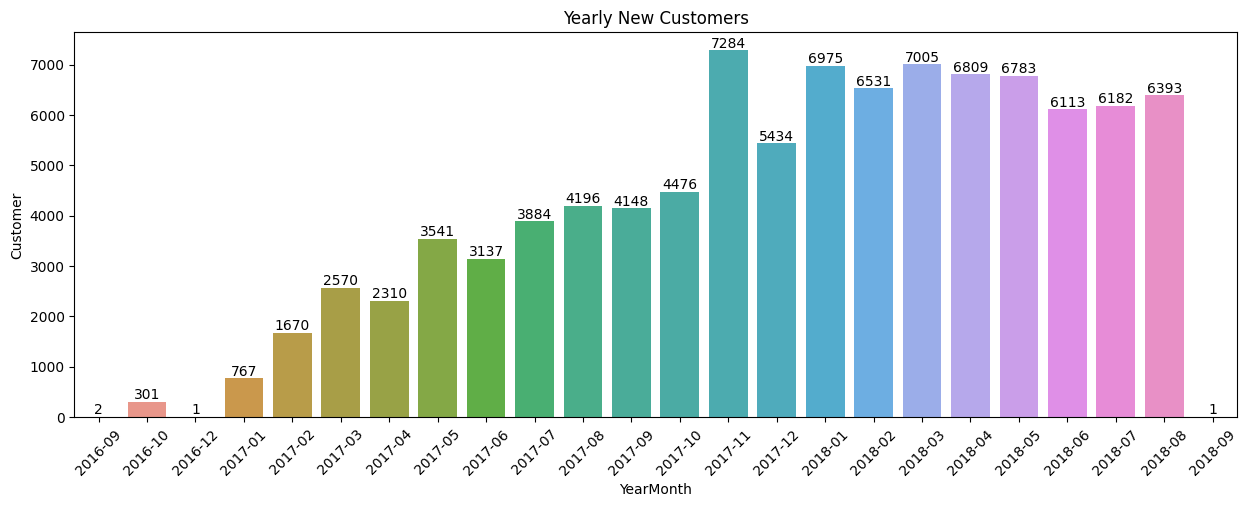

In [ ]:
# 고객 유입 시기 -> 단발성 구매가 왜 많았는지

fig, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.barplot(data=yearly_monthly_customer_counts, x='YearMonth', y='Customer', ax=ax3)

plt.xticks(rotation=45)
ax3.bar_label(ax3.containers[0])

plt.title('Yearly New Customers')

plt.show()

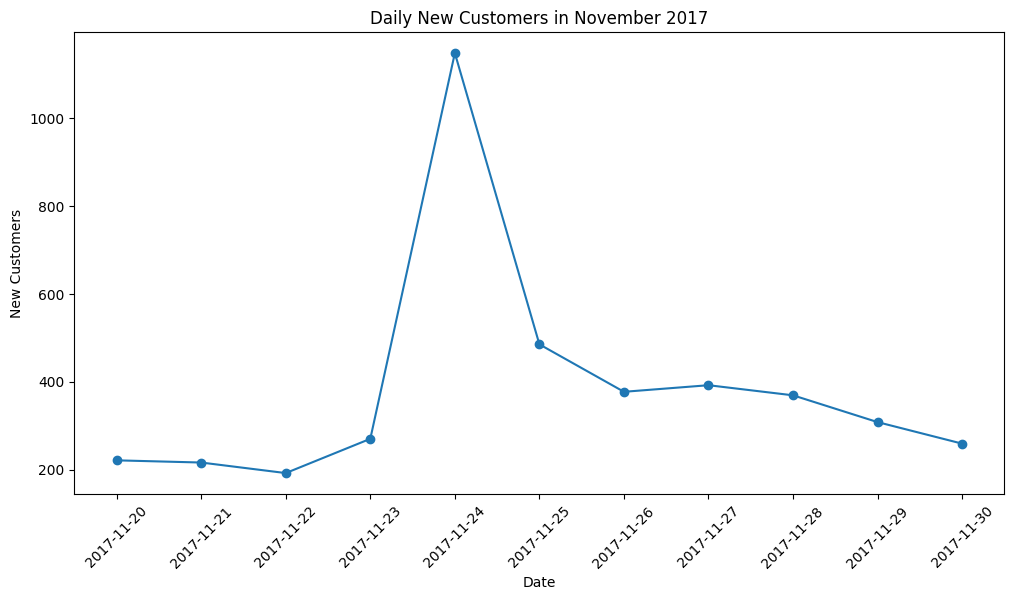

In [ ]:
# 데이터프레임에서 2017년 11월 데이터 필터링
november_2017_data = df[(df['Year'] == '2017') & (df['Month'] == '11')]

# 11월 20일부터 30일까지의 데이터 필터링
november_20_to_30 = november_2017_data[(november_2017_data['order_purchase_timestamp'].dt.day >= 20) & (november_2017_data['order_purchase_timestamp'].dt.day <= 30)]

# 일(Day) 단위로 데이터를 집계하고 각 날짜별 새로운 고객 수 계산
daily_new_customers = november_20_to_30.resample('D', on='order_purchase_timestamp')['customer_id'].nunique()

# 시계열 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(daily_new_customers.index, daily_new_customers.values, marker='o', linestyle='-')
plt.title('Daily New Customers in November 2017')
plt.xlabel('Date')
plt.ylabel('New Customers')

# X 축 눈금 설정
plt.xticks(rotation=45)  # X 축 눈금 레이블 회전
plt.xticks(pd.date_range(start='2017-11-20', end='2017-11-30', freq='D'))  # 20일부터 30일까지의 날짜로 설정

plt.show()

In [ ]:
# daily_new_customers Series에서 날짜와 값을 얻기
dates = daily_new_customers.index
values = daily_new_customers.values

# 각 날짜에 해당하는 값 출력
for date, value in zip(dates, values):
    print(f"날짜: {date}, 새로운 고객 수: {value}")

날짜: 2017-11-20 00:00:00, 새로운 고객 수: 221
날짜: 2017-11-21 00:00:00, 새로운 고객 수: 216
날짜: 2017-11-22 00:00:00, 새로운 고객 수: 192
날짜: 2017-11-23 00:00:00, 새로운 고객 수: 270
날짜: 2017-11-24 00:00:00, 새로운 고객 수: 1148
날짜: 2017-11-25 00:00:00, 새로운 고객 수: 485
날짜: 2017-11-26 00:00:00, 새로운 고객 수: 377
날짜: 2017-11-27 00:00:00, 새로운 고객 수: 392
날짜: 2017-11-28 00:00:00, 새로운 고객 수: 369
날짜: 2017-11-29 00:00:00, 새로운 고객 수: 308
날짜: 2017-11-30 00:00:00, 새로운 고객 수: 259
